In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [85]:
# Reading The Data
data = pd.read_csv('data/facebook_stock.csv', index_col='Date', parse_dates = True)

In [86]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800
2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400
2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900
2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200


In [87]:
# Checking for NAN OR Missing Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

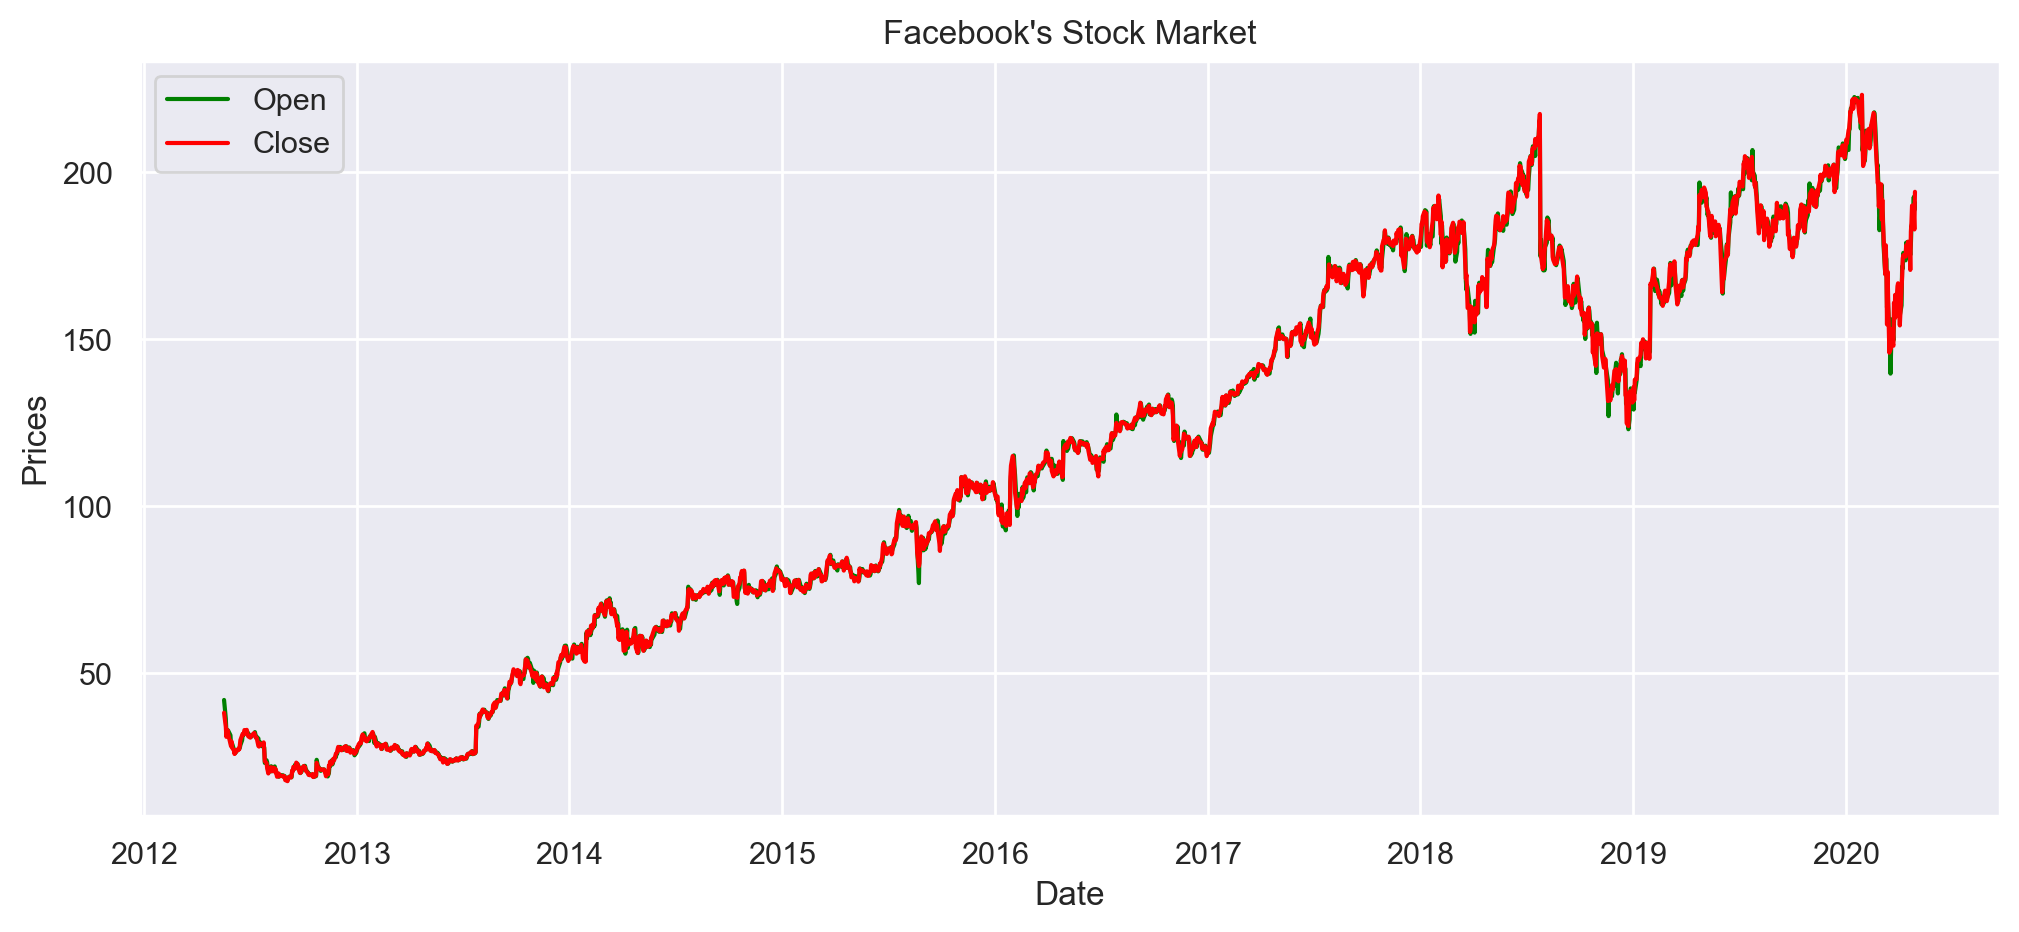

In [88]:
# Visualizing The Data
plt.figure(figsize=(12, 5), dpi=200)

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['Open'], label='Open', color='green')
plt.plot(data['Close'], label='Close', color='red')

plt.legend()
plt.show()

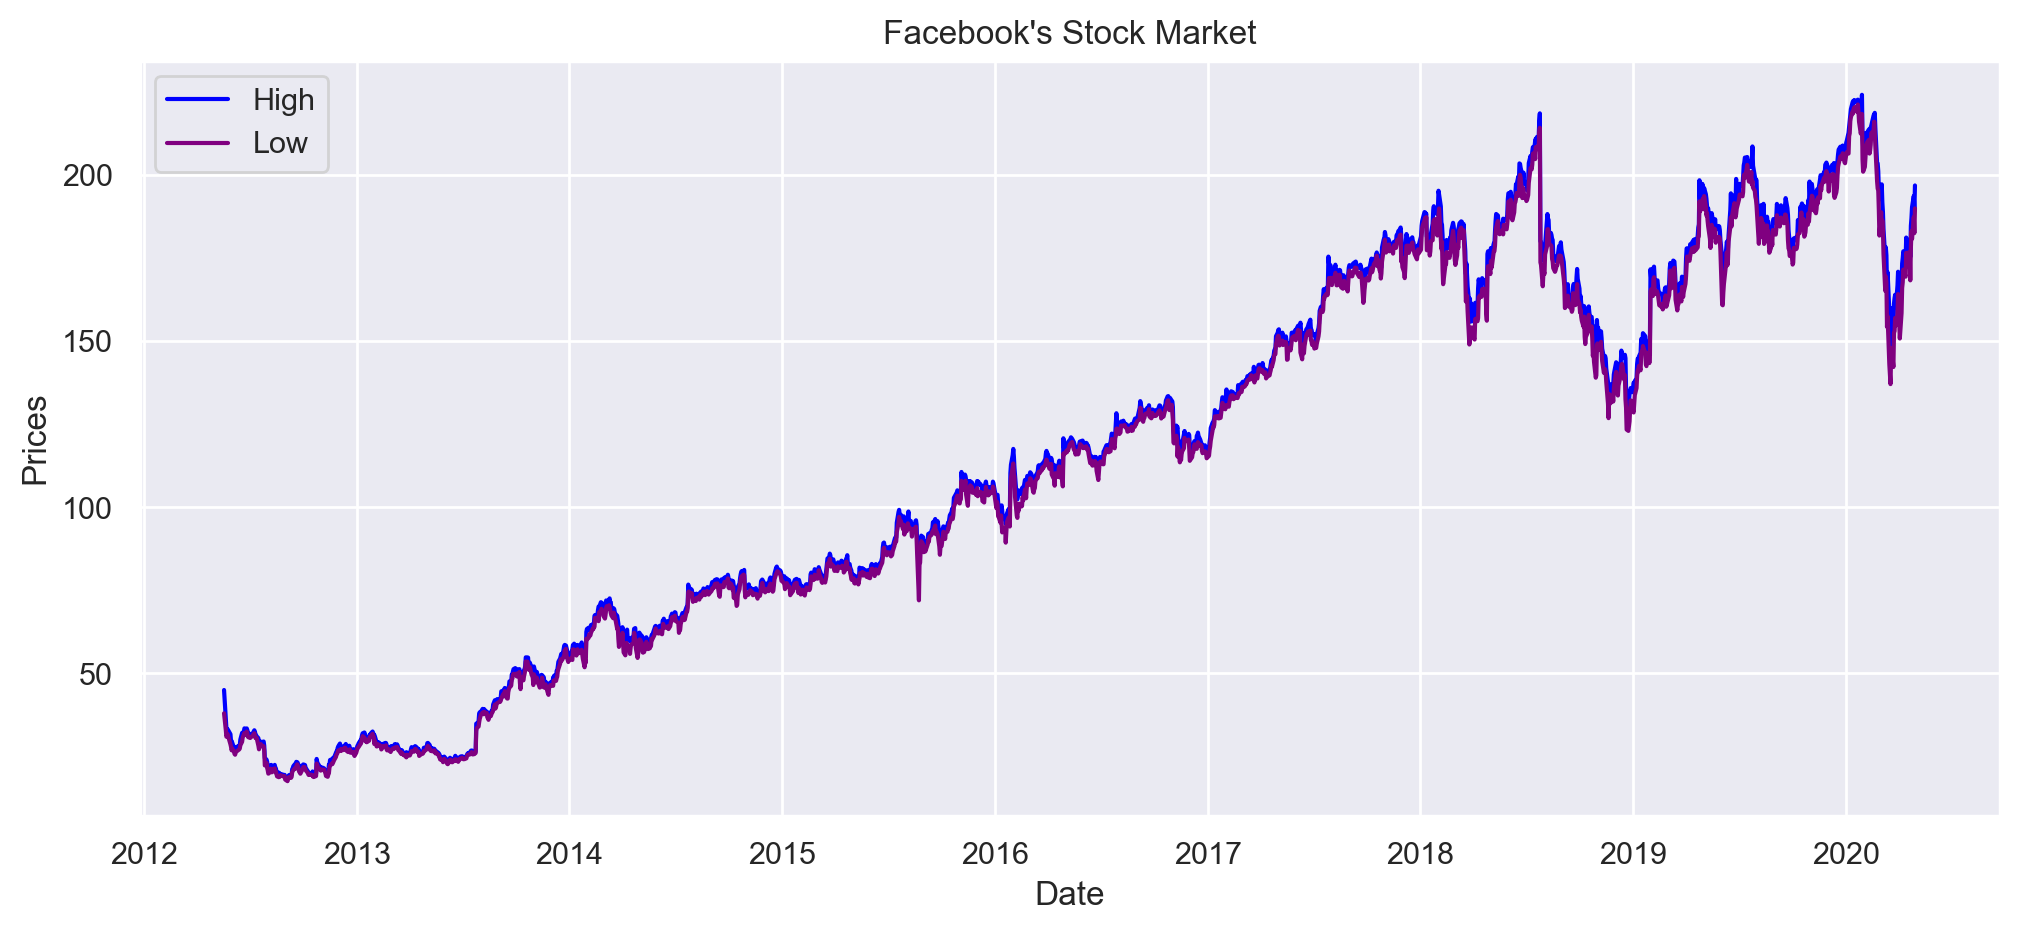

In [89]:
# Visualizing The Data
plt.figure(figsize=(12, 5), dpi=200)

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['High'], label='High', color='blue')
plt.plot(data['Low'], label='Low', color='purple')

plt.legend()
plt.show()

In [20]:
# Splitting The Data Into Training, Testing Data
training_data = data[data.index < '2019-01-01']
testing_data = data[data.index >= '2019-01-01']

training_data.shape, testing_data.shape

((1665, 6), (334, 6))

In [22]:
# Filtering The DataFrame
training_data = training_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
training_data.shape

(1665, 5)

In [23]:
# Normalizing The Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)

scaled_training_data

array([[0.12128111, 0.13341652, 0.10395486, 0.10261801, 1.        ],
       [0.09335154, 0.09178937, 0.07853803, 0.08159383, 0.28587298],
       [0.07351751, 0.07646619, 0.0680663 , 0.06642639, 0.16889149],
       ...,
       [0.57862782, 0.58258052, 0.56994711, 0.58462234, 0.04455   ],
       [0.59330093, 0.58722237, 0.58280803, 0.5780147 , 0.02944439],
       [0.5887978 , 0.58083355, 0.57137045, 0.56745255, 0.03296355]])

In [24]:
# Spitting The Data Into X_train, y_train with 60 timestamp
X_train = []
y_train = []

for i in range(60, scaled_training_data.shape[0]-60):
    X_train.append(scaled_training_data[i-60:i])
    y_train.append(scaled_training_data[i,[0, 3]])

In [25]:
# Converting Lists Into Numpy Arrays
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((1545, 60, 5), (1545, 2))

##### Building The Model

In [34]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import mean_squared_error

In [90]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 2))

In [91]:
model.compile(optimizer = Adam(), loss = 'mean_squared_error')

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [93]:
# Train The Model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
39/39 [==============================] - 21s 194ms/step - loss: 0.0160 - val_loss: 0.0053
Epoch 2/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0029 - val_loss: 0.0049
Epoch 3/100
39/39 [==============================] - 5s 127ms/step - loss: 0.0025 - val_loss: 0.0069
Epoch 4/100
39/39 [==============================] - 5s 137ms/step - loss: 0.0026 - val_loss: 0.0078
Epoch 5/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 6/100
39/39 [==============================] - 5s 141ms/step - loss: 0.0020 - val_loss: 0.0047
Epoch 7/100
39/39 [==============================] - 6s 163ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 8/100
39/39 [==============================] - 6s 159ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 9/100
39/39 [==============================] - 6s 149ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 10/100
39/39 [==============================] - 6s 162ms/step - loss: 0.0017 - val_l

In [94]:
metrics = pd.DataFrame(model.history.history)

In [95]:
metrics.head()

,loss,val_loss
0,0.015961,0.005323
1,0.002862,0.004927
2,0.002505,0.006902
3,0.002612,0.007820
4,0.002033,0.002621


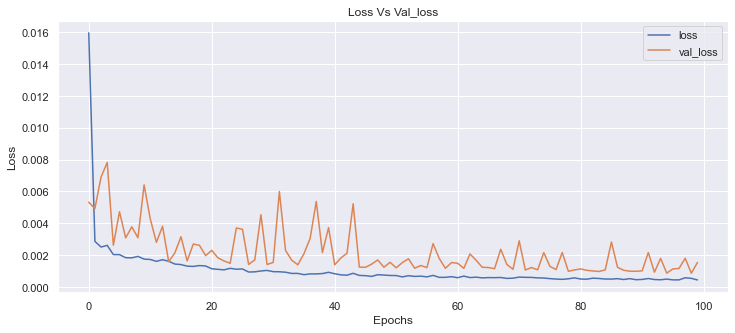

In [96]:
# Visualizing The Loss vs Val_loss
metrics[['loss','val_loss']].plot(figsize=(12, 5))
plt.title("Loss Vs Val_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.savefig('losses-3.png',dpi=200)

In [97]:
# Saving The Model
model.save('fb_stock_predictor_3.h5')

##### Testing Data Preprocessing

In [98]:
# Filtering The Test Data
testing_data = testing_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
testing_data.shape

(334, 5)

In [99]:
# Get past 60 days data from the training data
past_60_days_data = training_data.tail(60)

In [100]:
# Create The New Testing DataFrame
new_testing_data = past_60_days_data.append(testing_data)
new_testing_data.shape

(394, 5)

In [101]:
# Normalizing The Data
scaled_testing_data = scaler.transform(new_testing_data)
scaled_testing_data

array([[0.72546046, 0.71469933, 0.71065476, 0.7064124 , 0.03492651],
       [0.71407613, 0.71190416, 0.70480884, 0.69880363, 0.03493426],
       [0.69550694, 0.69912653, 0.69560795, 0.69840316, 0.03194305],
       ...,
       [0.88332323, 0.87586725, 0.86346076, 0.8498273 , 0.04101851],
       [0.86308441, 0.85315698, 0.8388064 , 0.8268509 , 0.02786493],
       [0.87456989, 0.89163967, 0.87662666, 0.88331582, 0.06971985]])

In [102]:
# Splitting The Test Data Into X_test, y_test
X_test = []
y_test = []

for i in range(60, scaled_testing_data.shape[0]):
    X_test.append(scaled_testing_data[i-60:i])
    y_test.append(scaled_testing_data[i,[0,3]])

In [103]:
# Converting Lists Into Numpy Array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape

((334, 60, 5), (334, 2))

In [104]:
# Evaluate The Model
loss = model.evaluate(X_test, y_test)
loss

11/11 [==============================] - 0s 41ms/step - loss: 0.0021


0.002081292914226651

##### Predictions

In [105]:
# Load The Model
model = keras.models.load_model('fb_stock_predictor_3.h5')

In [106]:
# Make Predictions
predictions = model.predict(X_test)

In [107]:
# Find The Mean Squared Error
mean_error = mean_squared_error(y_test, predictions)

mean_error

0.002081292678822699

In [108]:
# Check Scale
scaler.scale_

array([5.05970449e-03, 4.99126541e-03, 5.08336709e-03, 5.00575662e-03,
       1.76160763e-09])

In [109]:
scale_open = 1/5.05970449e-03
scale_close = 1/5.00575662e-03

In [110]:
# Unscaling The Predictions
predicted_open = predictions[:, 0]
predicted_close = predictions[:, 1]

predicted_open = predicted_open * scale_open
predicted_close = predicted_close * scale_close

In [111]:
# Unscaling the y_test
actual_open = y_test[:, 0]
actual_close = y_test[:, 1]

actual_open = actual_open * scale_open
actual_close = actual_close * scale_close

In [112]:
# Create The DataFrame For Actual_Open VS Predicted_Open
new_open_df = pd.DataFrame({"Actual Open": actual_open, "Predicted Open": predicted_open})

new_open_df.head()

,Actual Open,Predicted Open
0,110.910005,112.418556
1,116.610002,112.776733
2,115.929995,113.230064
3,119.479998,113.925407
4,121.809999,114.812927


## Visualizing Open Prices

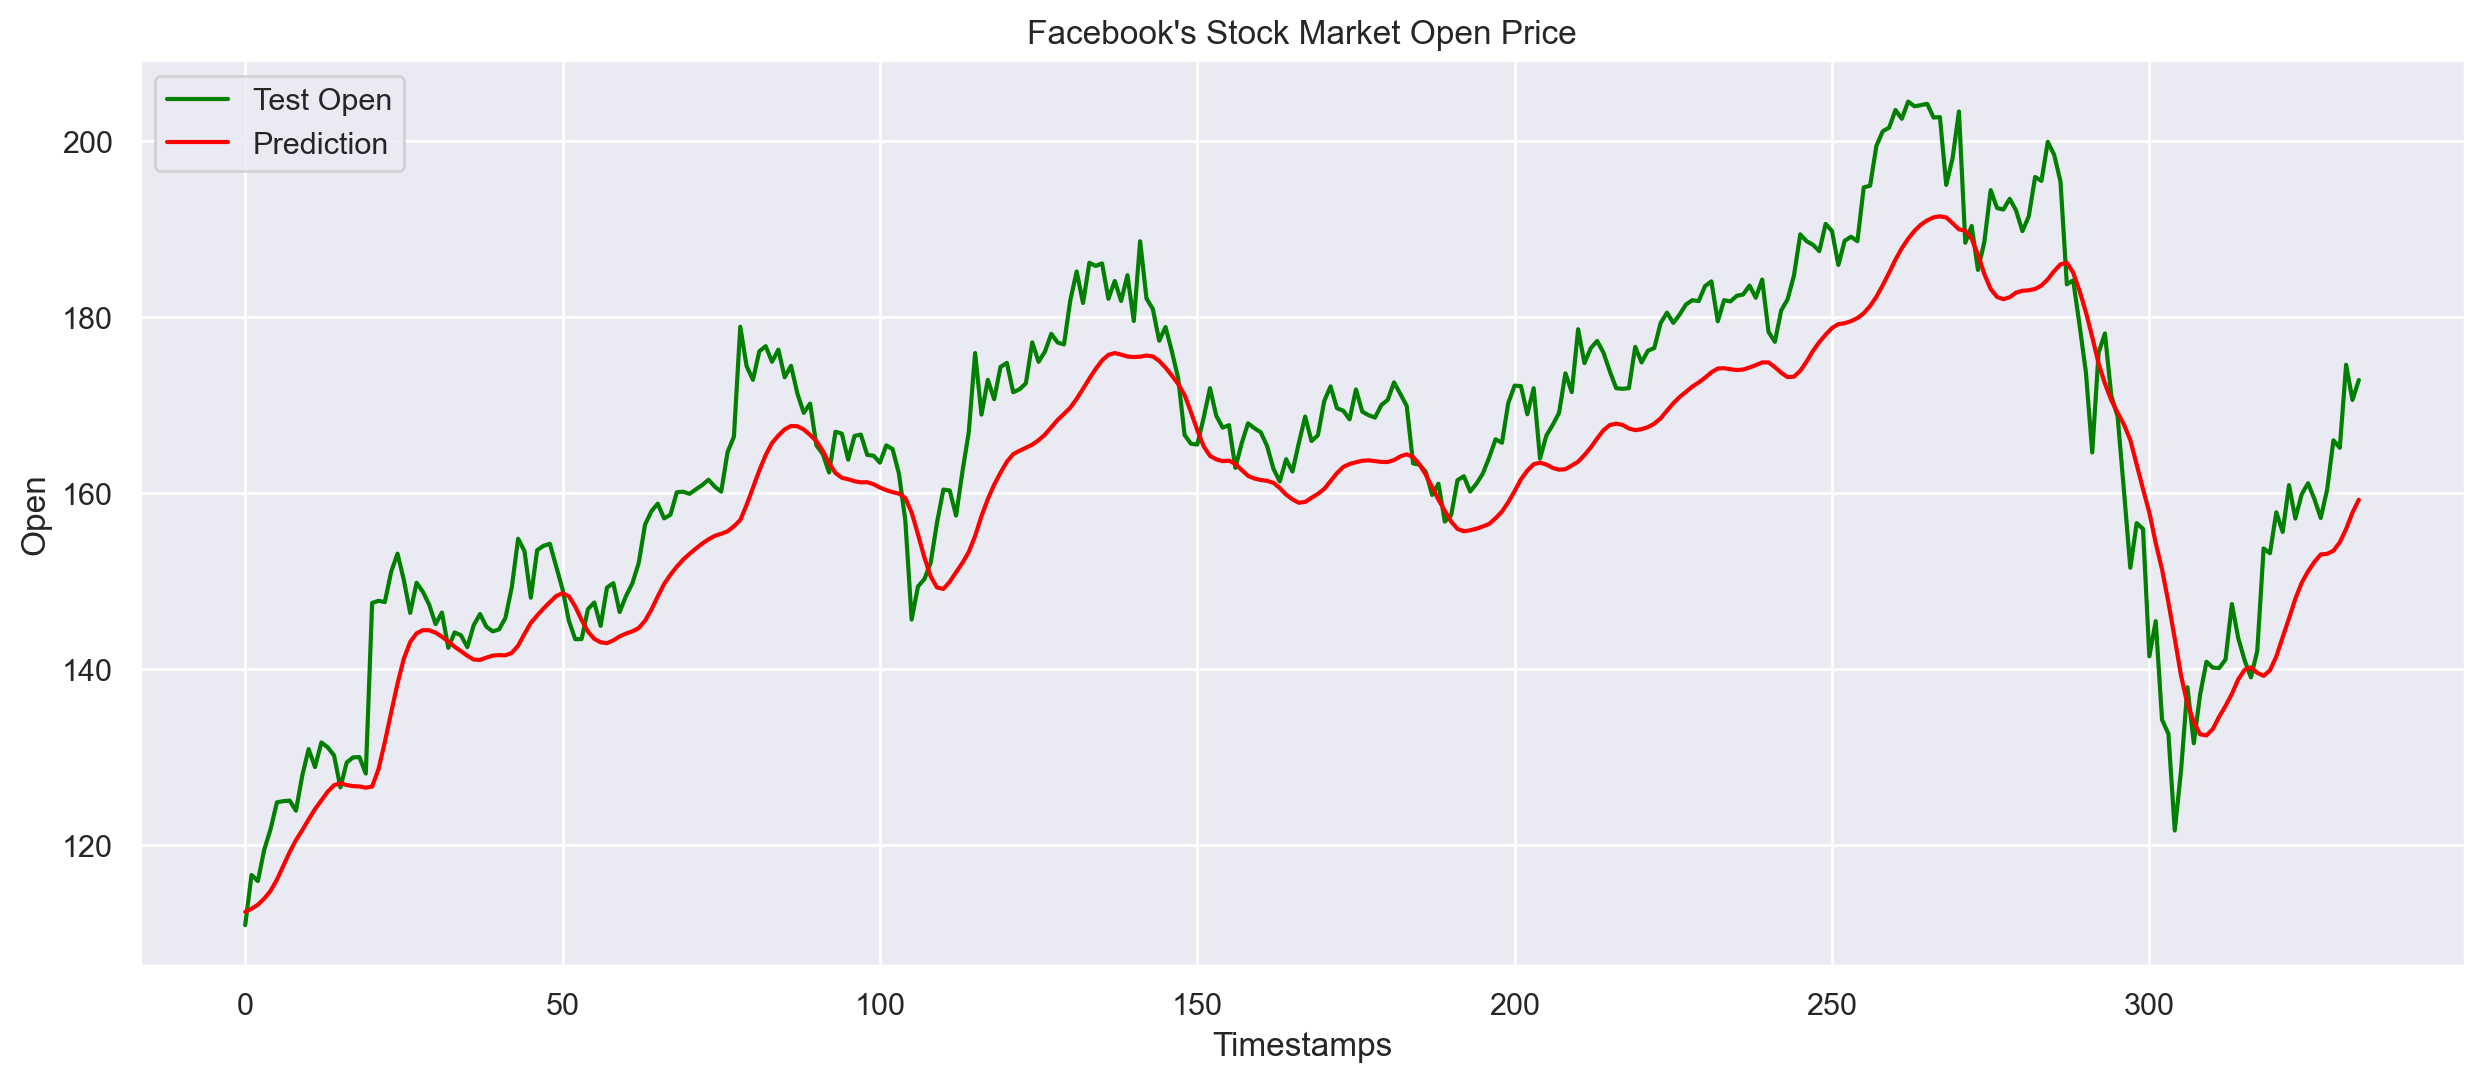

In [114]:
# Visualizing The Open Prices
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6), dpi=200)

plt.title("Facebook's Stock Market Open Price")
plt.xlabel('Timestamps')
plt.ylabel('Open')

plt.plot(new_open_df['Actual Open'], color='green')
plt.plot(new_open_df['Predicted Open'], color='red')

plt.legend(['Test Open', 'Prediction'], loc='upper left')
plt.savefig('facebook_stock_prediction_open_3.png', dpi=200)
plt.show()

In [115]:
# Create The DataFrame For Actual_Close VS Predicted_Close
new_close_df = pd.DataFrame({"Actual Close": actual_close, "Predicted Close": predicted_close})

new_close_df.head()

,Actual Close,Predicted Close
0,117.949993,112.506607
1,114.010005,112.832649
2,120.219997,113.258789
3,120.320003,113.928345
4,124.799999,114.792816


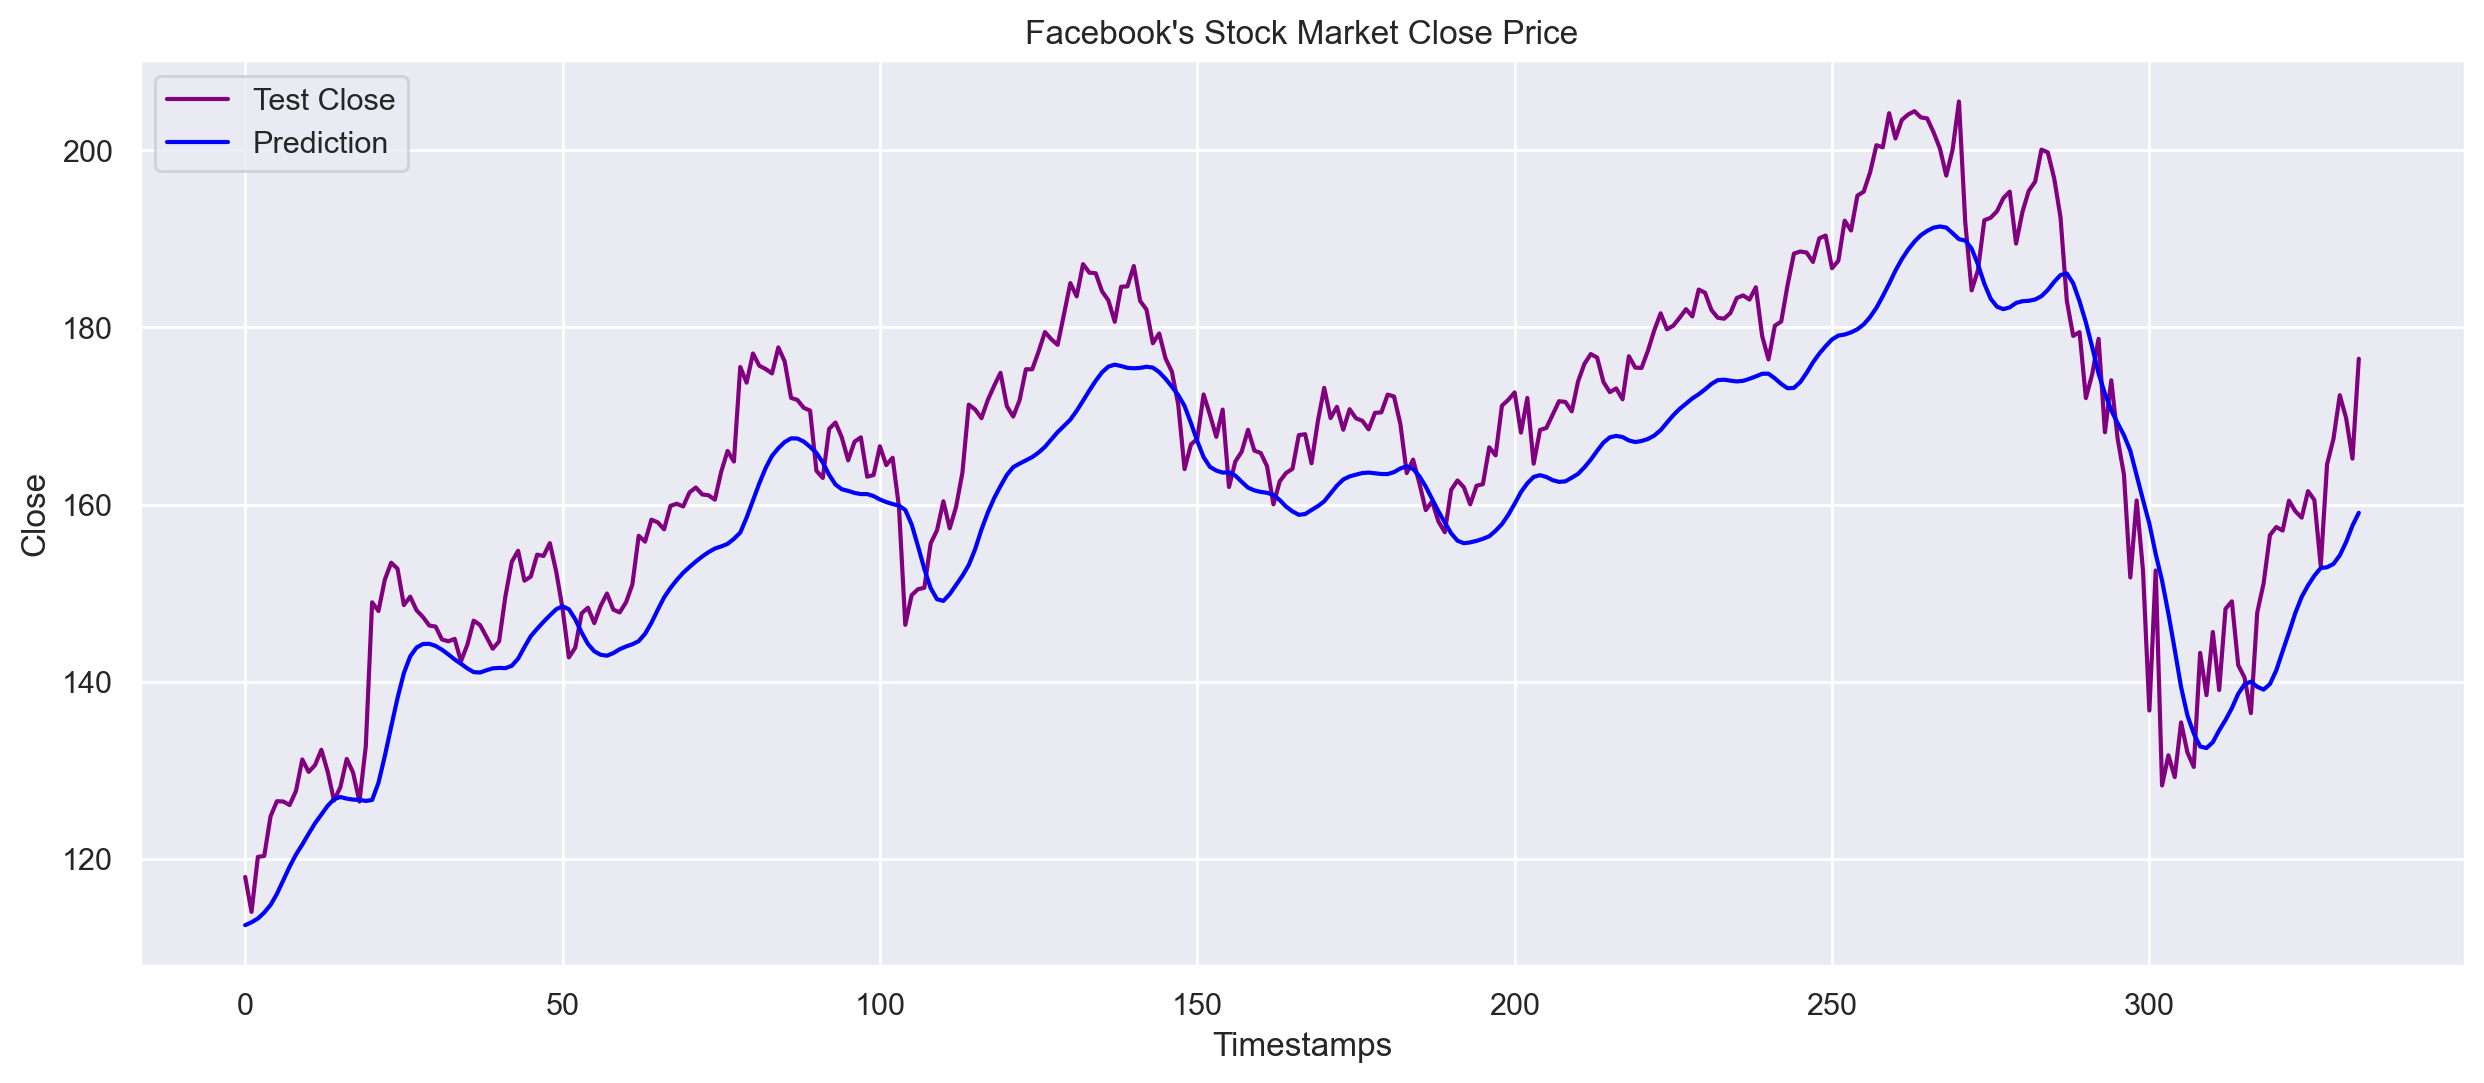

In [116]:
# Visualizing The Open Prices
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6), dpi=200)

plt.title("Facebook's Stock Market Close Price")
plt.xlabel('Timestamps')
plt.ylabel('Close')

plt.plot(new_close_df['Actual Close'], color='purple')
plt.plot(new_close_df['Predicted Close'], color='blue')

plt.legend(['Test Close', 'Prediction'], loc='upper left')
plt.savefig('facebook_stock_prediction_close_3.png', dpi=200)
plt.show()